# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
samples = 1000
X, y = make_classification(n_samples = samples, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1)
X

array([[ 0.68444483,  0.23342437],
       [-0.62334615,  1.24591859],
       [-0.83426496, -0.61661302],
       ...,
       [ 0.77882345,  0.82100536],
       [-1.10431239, -0.6888772 ],
       [-1.08025446, -0.42984468]])

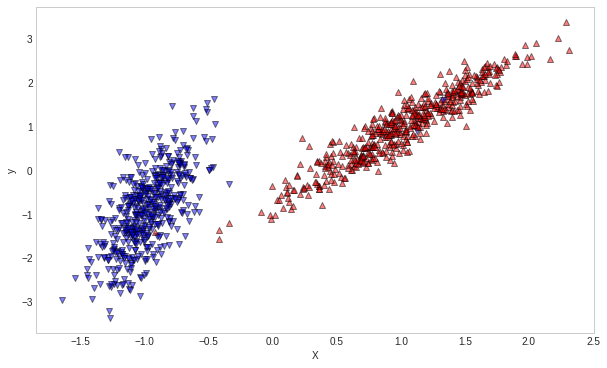

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = 0.5, marker = '^', c = 'r')
  else:
    ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = 0.5, marker = 'v', color = 'b')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.98
평가 데이터 점수: 0.975


In [ ]:
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = 10)
print("CV 평균 점수{}".format(scores.mean()))

CV 평균 점수0.9790000000000001


In [ ]:
model.intercept_, model.coef_

(array([1.7286499]), array([[-3.09124595,  2.83386257]]))

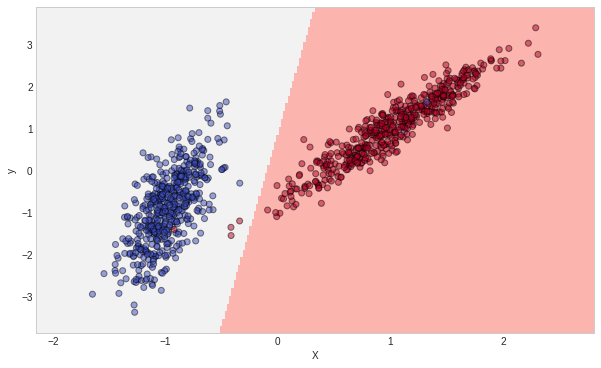

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # meshgrid는 배열 생성해주는 애
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # 배열 생성한거 ravel로 푼 뒤 c로 배열 붙여서 model에 넣어줌.

Z = Z.reshape(xx.shape) # xx의 shape에 맞춰서 Z reshape
plt.figure(1, figsize = (10, 6))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c = np.abs(y - 1), edgecolors = 'k', alpha = 0.5, cmap  = plt.cm.coolwarm) # c는 컬러. 두개 컬러값 다르게 하려고저렇게 한듯
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

## 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.keys())
print(iris.DESCR)

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype = 'category')
species = species.cat.rename_categories(iris.target_names) # pandas series는 .cat.rename_categories란 메서드에서 리스트를 받아서 카테고리화 가능
iris_df['species'] = species

In [ ]:
iris_df.describe()

In [ ]:
iris_df.boxplot();

In [ ]:
iris_df.plot()

In [ ]:
import seaborn as sns
sns.pairplot(iris_df, hue = 'species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2,3]], iris.target, test_size = 0.2, random_state = 1, stratify = iris.target) # petal 값만 사용, random_state는 다시 실행해도 똑같은 값 나오게 고정시켜줌
# stratify 계층적 데이터 추출 옵션 (분류 모델에서 추천!) : 여러 층으로 분할후 각 층별로 렌덤 데이터 추출, 원래 데이터의 분포와 유사하게 데이터 추출

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', C=100.0, random_state = 1) 
# solver는 기본값이 lbfgs, multi_class는 분류 갯수인데 자동으로 설정, C는 하이퍼파라미터. 값이 낮을수록 계수를 0으로 근사하므로 regularization이 강화됨. 로지스틱 회귀에서도 L2 regularization을 사용한다고 보면 됨.
# c 작음 -> 낮은 코스트 -> 훈련 덜 복잡 -> 강한 규제 -> 과소 적합
# c 큼 -> 높은 코스트 -> 훈련 더 복잡 -> 약한 규제 -> 과대 적합
model.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [ ]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

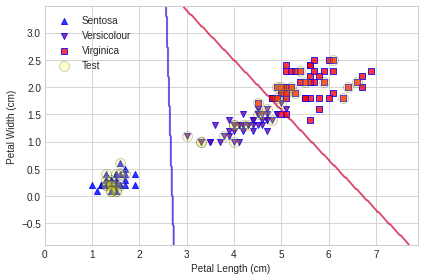

In [ ]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('Sentosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique는 중복되지 않는 고유한 값만을 반환함. https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=samsjang&logNo=220967436415#

plt.contour(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x = X[y== cl, 0],y= X[y==cl, 1],
              alpha = 0.8, c = colors[idx],
              marker = markers[idx], label = species[cl],
              edgecolor = 'b')
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:,0], X_comb_test[:, 1],
            c = 'yellow' , edgecolor ='k', alpha = 0.2,
            linewidth= 1, marker ='o',
            s = 100, label = 'Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout()

In [ ]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty':['l1', 'l2'],
               'C' : [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count())

gs

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
result = gs.fit(iris.data, iris.target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000131,0.000108,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.054434,0.005727,0.000556,0.000054,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000071,0.000012,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.052862,0.005053,0.000512,0.000064,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000076,0.000018,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.055005,0.007082,0.000553,0.000043,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000069,0.000009,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.054476,0.010088,0.000638,0.000362,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000122,0.000106,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.050545,0.010856,0.000522,0.000049,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [ ]:
import pandas as pd

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


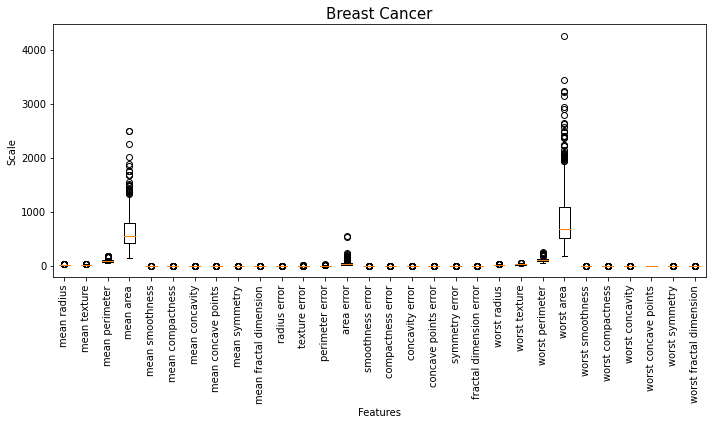

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = [10, 6])
plt.title('Breast Cancer', fontsize = 15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LogisticRegression(max_iter = 3000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.960093896713615
평가 데이터 점수: 0.965034965034965


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss = 'squared_loss')) # 선형 회귀에서는 주로 squared_loss를 사용
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.765096068271326
평가 데이터 점수: 0.6137602221827159


## 붓꽃 데이터에 대한 SGD 분류

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log')) # logistic 회귀 log
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [28]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8214285714285714
평가 데이터 점수: 0.6578947368421053


## 유방암 데이터에 대한 SGD 분류

In [32]:
X,y =load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log'))
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [34]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9859154929577465
평가 데이터 점수: 0.9790209790209791
